### Note for mentors:

I plotted the graphs separately because combining them in a subplot made them hard to read.

# Matplotlib Assignment

In [92]:
# Essential imports for data visualization
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import warnings
warnings.filterwarnings('ignore')

# Sample Datasets

In [93]:
# Set random seed for reproducibility
np.random.seed(42)

# 1. Sales Data - E-commerce sales with categories and dates
dates = pd.date_range('2023-01-01', '2023-12-31', freq='D')
categories = ['Electronics', 'Clothing', 'Books', 'Home & Garden', 'Sports']
sales_data = []

for date in dates:
    for category in categories:
        # Simulate seasonal patterns
        base_sales = np.random.normal(1000, 200)
        if date.month in [11, 12]:  # Holiday season
            base_sales *= 1.5
        elif date.month in [6, 7, 8]:  # Summer
            base_sales *= 1.2
        
        sales_data.append({
            'date': date,
            'category': category,
            'sales': max(0, base_sales + np.random.normal(0, 100)),
            'region': np.random.choice(['North', 'South', 'East', 'West'])
        })

sales_df = pd.DataFrame(sales_data)

# 2. Iris-like Dataset - Customer demographics
n_customers = 1000
customer_data = {
    'age': np.random.normal(35, 12, n_customers),
    'income': np.random.lognormal(10, 0.5, n_customers),
    'satisfaction': np.random.beta(2, 2, n_customers) * 10,
    'loyalty_score': np.random.exponential(2, n_customers),
    'segment': np.random.choice(['Premium', 'Standard', 'Basic'], n_customers, p=[0.2, 0.5, 0.3])
}
customer_df = pd.DataFrame(customer_data)

# 3. Stock Price Data - Simulated financial time series
stock_dates = pd.date_range('2023-01-01', '2023-12-31', freq='D')
stock_prices = []
price = 100

for date in stock_dates:
    # Random walk with drift
    price += np.random.normal(0.1, 2)
    price = max(price, 10)  # Floor price
    stock_prices.append({
        'date': date,
        'price': price,
        'volume': np.random.lognormal(8, 1)
    })

stock_df = pd.DataFrame(stock_prices)

## Assignment 1 

1. Include: sales over time, category distribution, regional comparison, and top performing products
2. Use both Matplotlib and Seaborn
3. Add proper titles, labels, and formatting

In [94]:
sales_df


,date,category,sales,region
0,2023-01-01,Electronics,1085.516400,East
1,2023-01-01,Clothing,1231.617179,South
2,2023-01-01,Books,1156.859787,West
3,2023-01-01,Home & Garden,919.892723,West
4,2023-01-01,Sports,960.361127,West
...,...,...,...,...
1820,2023-12-31,Electronics,1616.147405,East
1821,2023-12-31,Clothing,846.633814,West
1822,2023-12-31,Books,1579.806856,North
1823,2023-12-31,Home & Garden,1221.885551,South


In [95]:
sales_df['date'] = pd.to_datetime(sales_df['date'])

In [96]:
sales_over_time = sales_df.groupby('date')['sales'].sum().reset_index()

In [97]:
sales_over_time

,date,sales
0,2023-01-01,5354.247216
1,2023-01-02,4822.643793
2,2023-01-03,4301.572958
3,2023-01-04,5727.897139
4,2023-01-05,4904.412424
...,...,...
360,2023-12-27,6516.373425
361,2023-12-28,7141.293797
362,2023-12-29,7215.957079
363,2023-12-30,8465.748224


In [98]:
plt.figure(figsize=(14, 10))

<Figure size 1400x1000 with 0 Axes>

<Figure size 1400x1000 with 0 Axes>

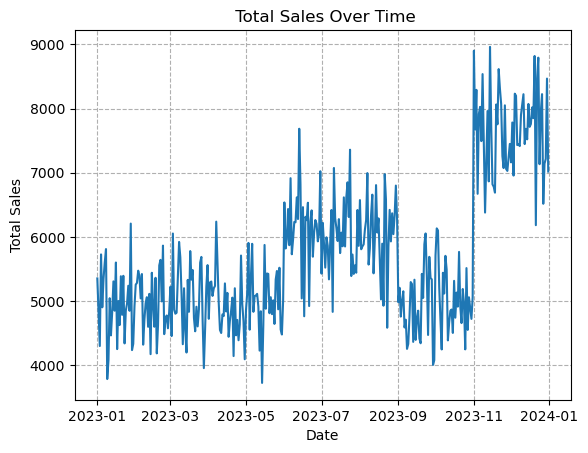

In [99]:
sns.lineplot(x='date', y='sales', data=sales_over_time)
plt.title(' Total Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.grid(True, linestyle='--', alpha=1)
plt.savefig('sales_dashboard1.pdf', format='pdf')
plt.show()

In [100]:
category_sales = sales_df.groupby('category')['sales'].sum().reset_index().sort_values('sales')

In [101]:
category_sales

,category,sales
0,Books,414567.420177
1,Clothing,415619.601758
3,Home & Garden,415645.050605
4,Sports,418154.467640
2,Electronics,419007.592552


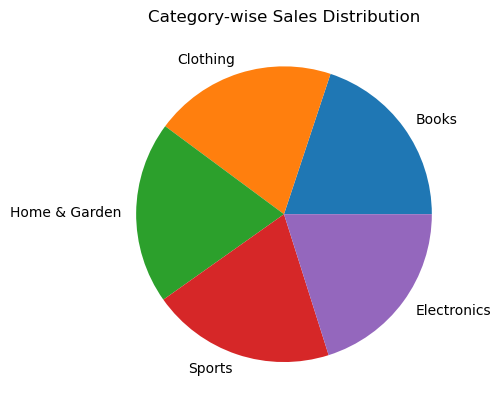

In [102]:
plt.pie(category_sales['sales'], labels=category_sales['category'])
plt.title('Category-wise Sales Distribution')
plt.savefig('sales_dashboard12.pdf', format='pdf')
plt.show()

In [103]:
region_sales = sales_df.groupby('region')['sales'].sum().reset_index()

In [104]:
region_sales

,region,sales
0,East,511310.503382
1,North,529255.761965
2,South,516016.997767
3,West,526410.869618


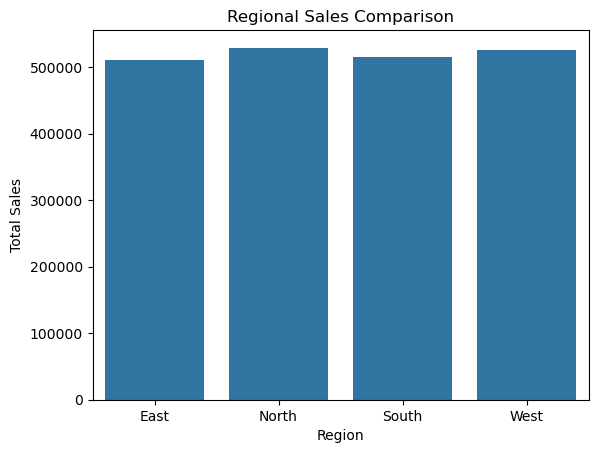

In [105]:
sns.barplot(x='region', y='sales', data=region_sales)
plt.title('Regional Sales Comparison')
plt.xlabel('Region')
plt.ylabel('Total Sales')
plt.savefig('sales_dashboard3.pdf', format='pdf')
plt.show()

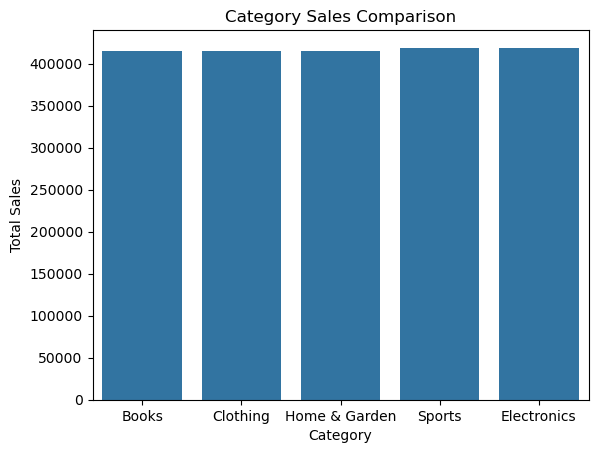

In [106]:
sns.barplot(x='category', y='sales', data=category_sales)
plt.title('Category Sales Comparison')
plt.xlabel('Category')
plt.ylabel('Total Sales')
plt.savefig('sales_dashboard4.pdf', format='pdf')
plt.show()

## Assignment 2

Objective: Create a comprehensive statistical analysis of customer data.

Requirements:

1. Show distribution of key metrics
2. Include correlation analysis
3. Add statistical annotations (mean, median, etc.)

In [108]:
customer_df

,age,income,satisfaction,loyalty_score,segment
0,70.557301,12921.639277,5.068781,2.640431,Basic
1,47.907890,22583.910742,2.465860,0.230169,Premium
2,45.025094,18654.128414,8.084518,2.789132,Basic
3,25.834536,37120.438408,4.832619,0.093564,Standard
4,41.297670,27767.360394,2.657332,0.451338,Standard
...,...,...,...,...,...
995,35.713424,25598.338766,7.378510,1.279642,Standard
996,50.051419,45921.836864,4.409315,1.370103,Standard
997,39.748179,6278.852619,3.626319,3.312863,Standard
998,44.035072,38423.851727,3.354447,0.833082,Premium


In [109]:
customer_df.describe()

,age,income,satisfaction,loyalty_score
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,35.575069,25100.915445,4.934726,2.047668
std,11.747834,13157.953713,2.232055,2.082620
min,0.253308,4238.113390,0.230123,0.000237
25%,27.347113,15838.998056,3.212649,0.607287
50%,35.294208,22399.587823,4.988549,1.448062
75%,43.356803,31460.428483,6.527718,2.743003
max,83.630601,89276.159929,9.950941,17.208984


In [110]:
metrics = ['age', 'income', 'satisfaction', 'loyalty_score']

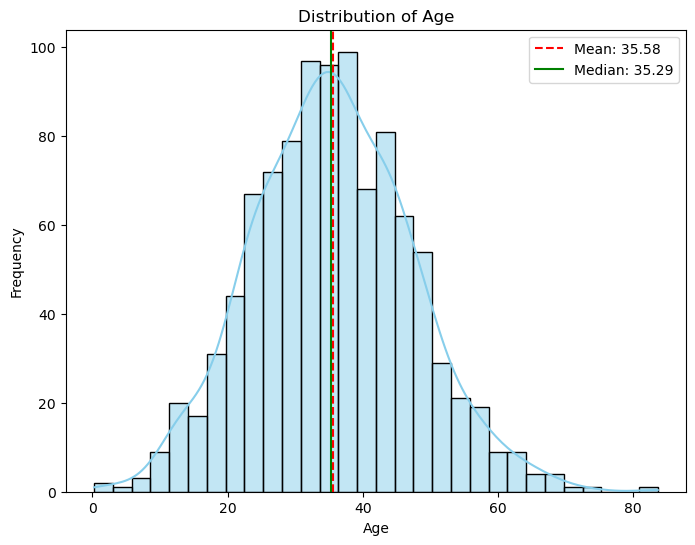

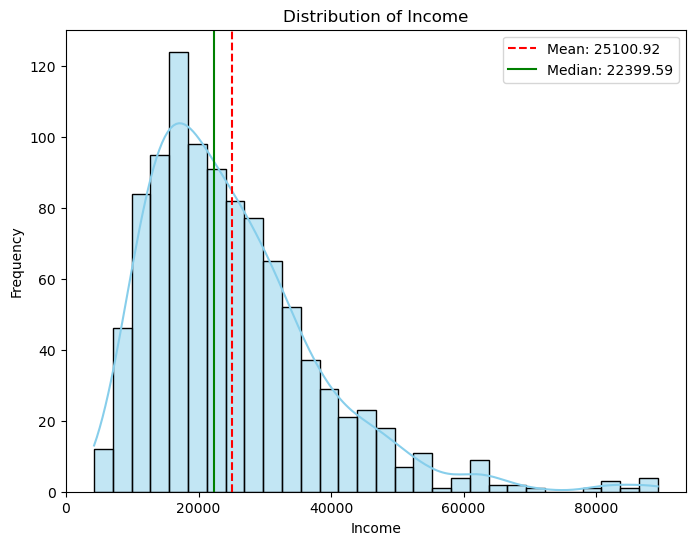

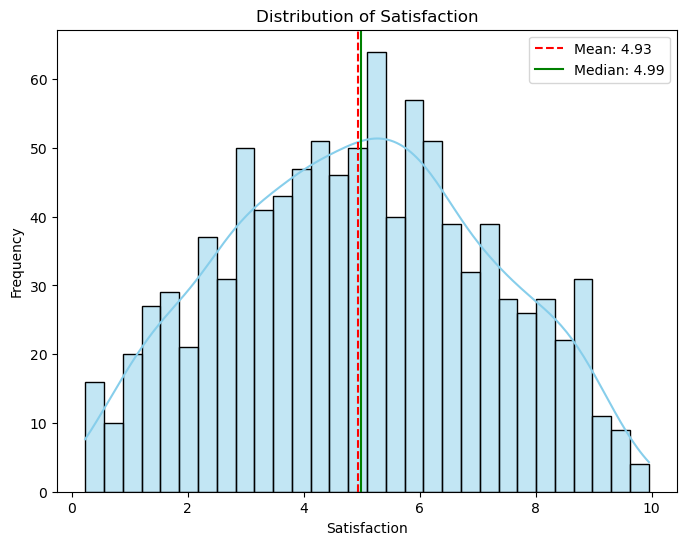

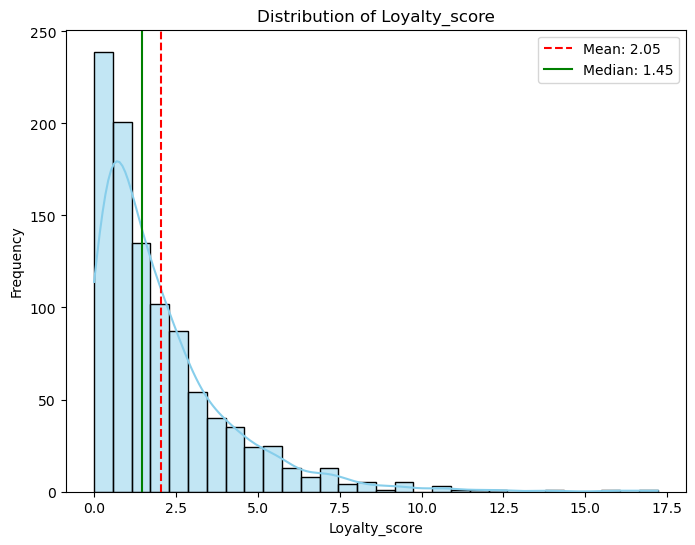

In [111]:
for metric in metrics:
    plt.figure(figsize=(8,6))
    sns.histplot(customer_df[metric], kde=True, color='skyblue', bins=30)
    
    
    mean_val = customer_df[metric].mean()
    median_val = customer_df[metric].median()
    
    plt.axvline(mean_val, color='red', linestyle='--', label=f'Mean: {mean_val:.2f}')
    plt.axvline(median_val, color='green', linestyle='-', label=f'Median: {median_val:.2f}')
    
    plt.title(f'Distribution of {metric.capitalize()}')
    plt.xlabel(metric.capitalize())
    plt.ylabel('Frequency')
    plt.legend()
    
    
    plt.savefig(f'{metric}_distribution.pdf', format='pdf')
    plt.show()

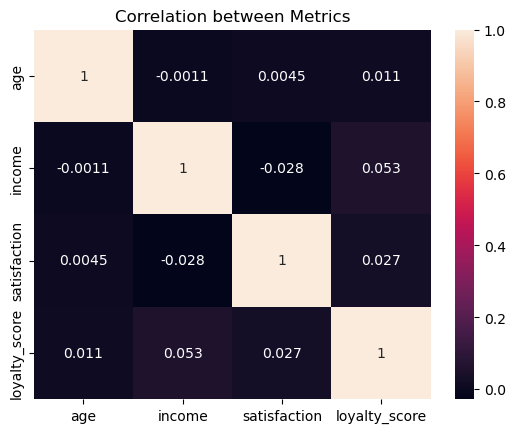

In [112]:
corr = customer_df[metrics].corr()
sns.heatmap(corr, annot=True)
plt.title('Correlation between Metrics')
plt.savefig('customer_correlation.pdf', format='pdf')
plt.show()

## Assignment 3

1. Show price trends over time
2. Include volume analysis
3. Add moving averages
4. Highlight significant events

In [113]:
stock_df

,date,price,volume
0,2023-01-01,98.063325,3925.325257
1,2023-01-02,95.693441,485.012663
2,2023-01-03,98.142733,11486.164759
3,2023-01-04,95.882693,711.953955
4,2023-01-05,94.676314,10433.826469
...,...,...,...
360,2023-12-27,128.287955,2979.013421
361,2023-12-28,127.094899,4215.616095
362,2023-12-29,126.777181,15745.574512
363,2023-12-30,124.353280,134.220193


In [114]:
stock_df['date'] = pd.to_datetime(stock_df['date'])
stock_df = stock_df.sort_values('date')

In [115]:
# moving average
stock_df['MA_7'] = stock_df['price'].rolling(window=7).mean()
stock_df['MA_30'] = stock_df['price'].rolling(window=30).mean()


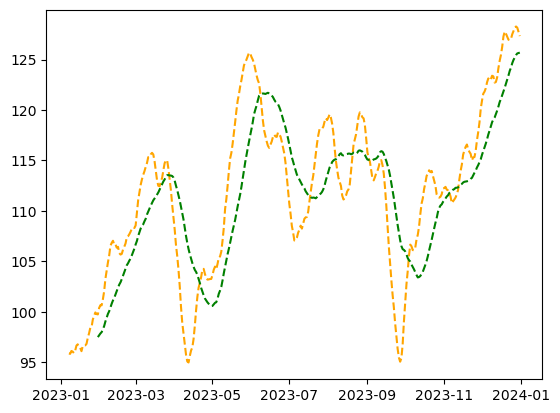

In [116]:
plt.plot(stock_df['date'], stock_df['MA_7'], label='7-Day MA', color='orange', linestyle='--')
plt.plot(stock_df['date'], stock_df['MA_30'], label='30-Day MA', color='green', linestyle='--')
plt.savefig('moving_average.pdf', format='pdf')
plt.show()

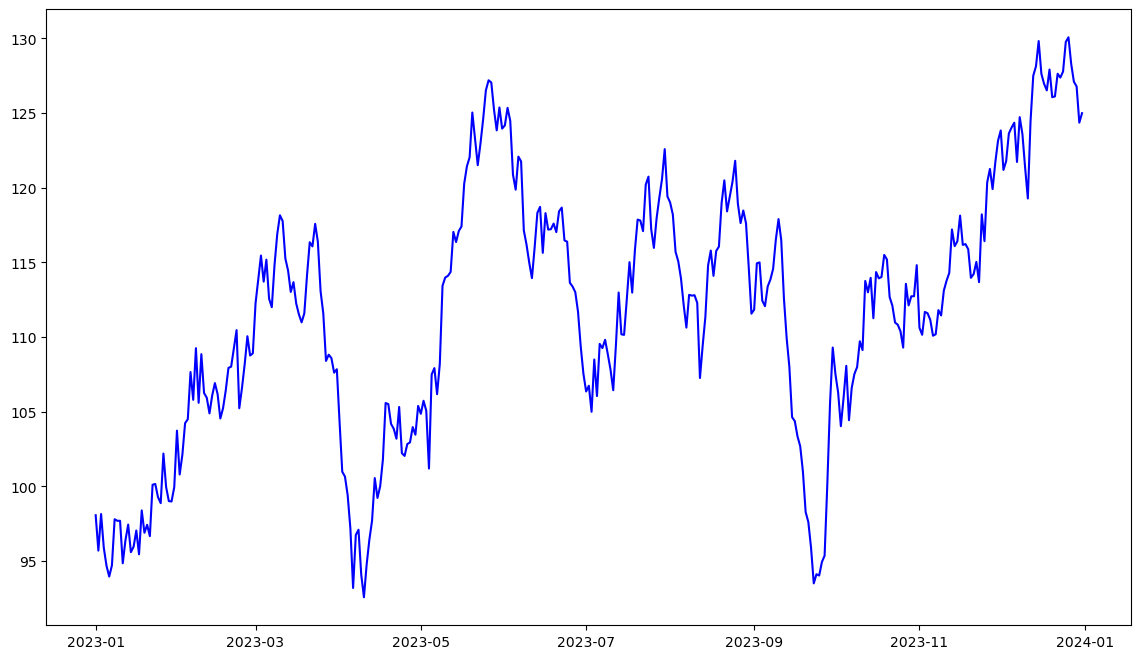

In [117]:
# price over time plot

plt.figure(figsize=(14,8))
plt.plot(stock_df['date'], stock_df['price'], label='Price', color='blue')
plt.savefig('price_over_time.pdf', format='pdf')
plt.show()

In [118]:
max_val = stock_df['price'].max()
max_val

130.07160458260958

In [119]:
min_val = stock_df['price'].max()
min_val

130.07160458260958

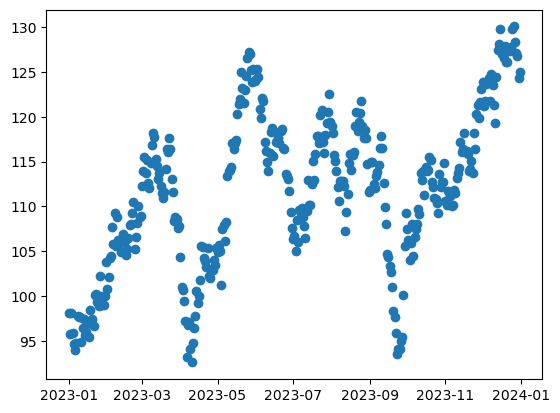

In [120]:
plt.scatter(x=stock_df['date'], y= stock_df['price'])
plt.savefig('scatterplot.pdf', format='pdf')
plt.show()

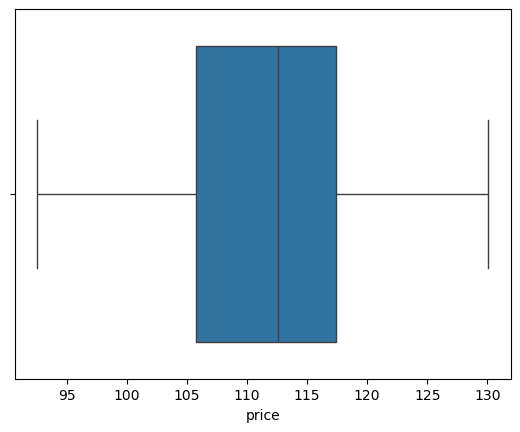

In [122]:
sns.boxplot(x='price', data=stock_df)
plt.savefig('boxplot.pdf', format='pdf')
plt.show()